Fake News Classifier

projectbackground proyek kali ini dibuat dengan tujuan untuk dapat mengidentifikasi dan mengklasifikasi news apakah fake atau true news. proyek ini akan sampai dengan memilih model yang paling sesuai untuk kasus dan data yang ada sehingga model ini nantinya akan digunakan dalam klasifikasi fake news selanjutnya

import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
import re
import string

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\X1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


load dataset

In [7]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df.shape

(20800, 5)

In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.reset_index(inplace=True)

Exploratory data analysis

7924
10361


([<matplotlib.patches.Wedge at 0x1e091c89e90>,
 [Text(-0.22861036734329143, 1.0759820165519336, 'True News'),
  Text(0.2286102666025835, -1.0759820379559761, 'Fake News')],
 [Text(-0.12469656400543168, 0.5868992817556, '56.7%'),
  Text(0.12469650905595461, -0.5868992934305324, '43.3%')])

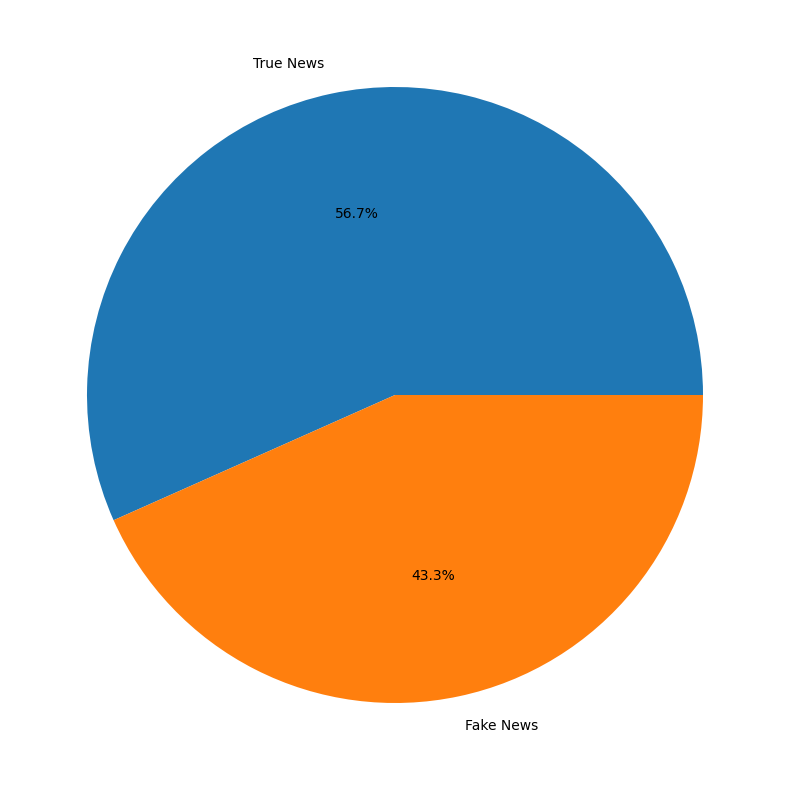

In [12]:
df_false = df[df["label"]==1].value_counts().sum()
df_true = df[df["label"]==0].value_counts().sum()
print(df_false)
print(df_true)
data_for_pie = [df_true,df_false]
labels= ["True News","Fake News"]
plt.figure(figsize=(10,10))
plt.pie(data_for_pie, labels= labels, autopct='%1.1f%%')

Dari dataset yang ada sebelumnya diketahui bahwa fakenews mencapai 56.7% dari total keseluruhan berita, dengan jumlah fakenews mencapai 10361 berita

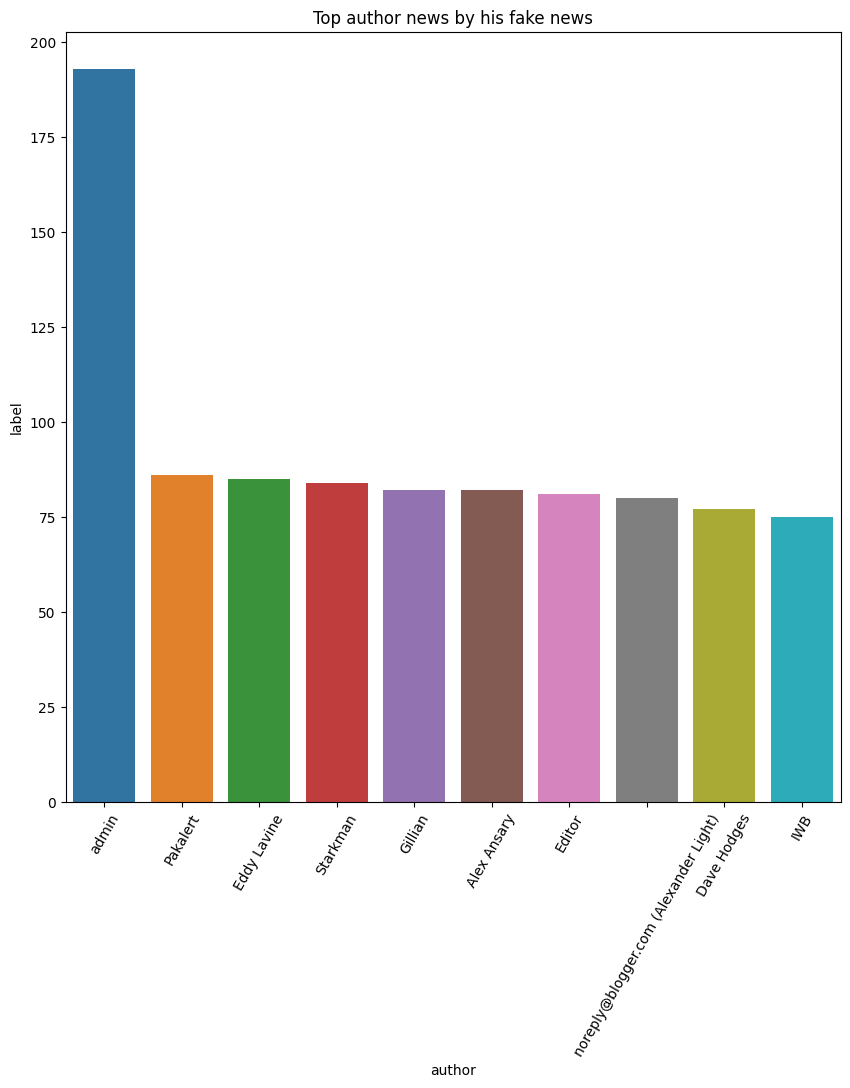

In [13]:
data_forbar = df[df["label"]==1]["author"].value_counts().reset_index().head(10)
data_forbar.columns= ["author", "label"]
plt.figure(figsize=(10,10))
sns.barplot(x="author", y="label", data = data_forbar)
plt.title("Top author news by his fake news")
plt.xticks(rotation = 60)
plt.show()

Berdasarkan author admin menjadi author dengan fake news terbanyak mencapai lebih dari 175 diikuti oleh author lain seperti pakalert dan eddy lavine

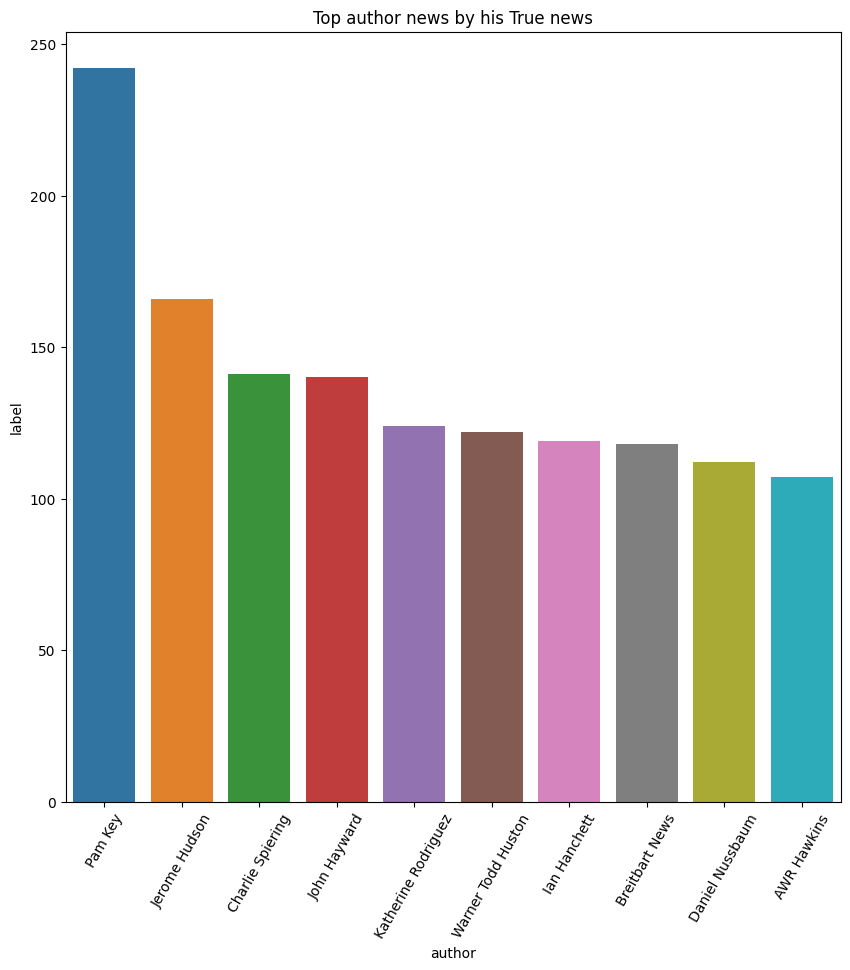

In [14]:
data_forbar2 = df[df["label"]==0]["author"].value_counts().reset_index().head(10)
data_forbar2.columns= ["author", "label"]
plt.figure(figsize=(10,10))
sns.barplot(x="author", y="label", data = data_forbar2)
plt.title("Top author news by his True news")
plt.xticks(rotation = 60)
plt.show()

Sedangkan berdasarkan author nya, pamkey menjadi author dengan kontribusi true news terbanyak mencapai hampir 250 berita, diikuti oleh jerome hudson da charlie spiering

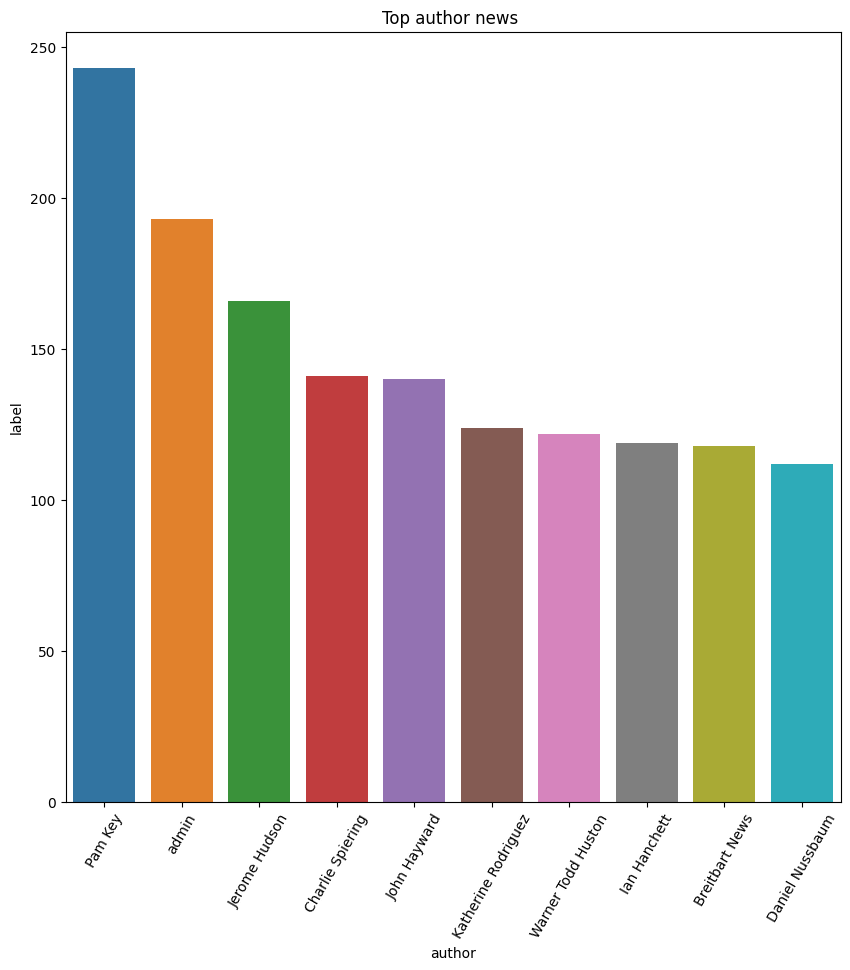

In [15]:
data_forbar3 = df["author"].value_counts().reset_index().head(10)
data_forbar3.columns= ["author", "label"]
plt.figure(figsize=(10,10))
sns.barplot(x="author", y="label", data = data_forbar3)
plt.title("Top author news ")
plt.xticks(rotation = 60)
plt.show()

Berdasarkan kontribusi pemberitaan pam key menjadi yang paling tertinggi diikuti oleh admin dan jerome hudson

Text cleaning

In [16]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
df["text"].head(10)

0    house dem aide  we didn t even see comey s let...
1    ever get the feeling your life circles the rou...
2    why the truth might get you fired october     ...
3    videos   civilians killed in single us airstri...
4    print  an iranian woman has been sentenced to ...
5    in these trying times  jackie mason is the voi...
6    paris      france chose an idealistic  traditi...
7    a week before michael t  flynn resigned as nat...
8    organizing for action  the activist group that...
9    the bbc produced spoof on the  real housewives...
Name: text, dtype: object

In [17]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Buat kolom baru 'processed_text' untuk menyimpan hasil preprocessing
df['processed_text'] = ''

for i in range(0, len(df)):
    # Pembersihan dan tokenisasi teks
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i]).lower().split()
    
    # Stemming dan penghilangan stopwords
    review = [ps.stem(word) for word in review if word not in stop_words]
    
    # Gabungkan kembali token menjadi kalimat
    review = ' '.join(review)
    
    df.at[i, 'processed_text'] = review

In [18]:
df.processed_text

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
18280    rapper unload black celebr met donald trump el...
18281    green bay packer lost washington redskin week ...
18282    maci today grew union sever great name america...
18283    nato russia hold parallel exercis balkan press...
18284    david swanson author activist journalist radio...
Name: processed_text, Length: 18285, dtype: object

Tfid vectorizer

In [19]:
X= df["processed_text"]
Y = df["label"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.5)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

count vectorizer

In [20]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [21]:
print(tfidf_test)

  (0, 84565)	0.02118940787500196
  (0, 83103)	0.010257669409722088
  (0, 83081)	0.016835636450209093
  (0, 83073)	0.009120774396322738
  (0, 81757)	0.010305267294989947
  (0, 81730)	0.016637972439616823
  (0, 81665)	0.02504944907770381
  (0, 81616)	0.019037314790320652
  (0, 81377)	0.009545515623902209
  (0, 81280)	0.01561006828332173
  (0, 81269)	0.016265281207027315
  (0, 80613)	0.02256662137087612
  (0, 80247)	0.03259565212200868
  (0, 79893)	0.025958307206982653
  (0, 79592)	0.02189882756103266
  (0, 79486)	0.01647710820410751
  (0, 78443)	0.02061286814724586
  (0, 77689)	0.04736427164982373
  (0, 77688)	0.04736427164982373
  (0, 77305)	0.027114810983361142
  (0, 76790)	0.04063952108820707
  (0, 76503)	0.01069626795650239
  (0, 76448)	0.034738930730333156
  (0, 76335)	0.04400189636901541
  (0, 76309)	0.031847885341867894
  :	:
  (5485, 10719)	0.023484553291412375
  (5485, 10705)	0.03262373889381788
  (5485, 10409)	0.024956013009841686
  (5485, 10147)	0.05745757875334897
  (5485, 88

Ml model

In [23]:
#function Build
def modelmltfidf(model) :
    modelfit=model.fit(tfidf_train, Y_train)
    train_pred = modelfit.predict(tfidf_train)
    test_pred = modelfit.predict(tfidf_test)
    train_accuracy = round(accuracy_score(Y_train,train_pred),4)*100
    test_accuracy = round(accuracy_score(Y_test, test_pred),4)*100
    matrik_test = metrics.confusion_matrix(Y_test, test_pred)
    wrong_predict_made = (Y_test !=test_pred).sum(),"/", len(Y_test)

    print("Accuracy model in train data", train_accuracy, "%")
    print("Accuracy model in test data", test_accuracy, "%")
    print("Confusion Matrik in test data\n", matrik_test)
    print("Wrong prediction made", wrong_predict_made)
    print("Visualisasi Confusion matrik")
    sns.heatmap(matrik_test, cmap="coolwarm", annot=True)

def modelmlcv(model) :
    modelfit = model.fit(count_train, Y_train)
    train_pred = modelfit.predict(count_train)
    test_pred = modelfit.predict(count_test)
    train_accuracy = round(accuracy_score(Y_train,train_pred),4)*100
    test_accuracy = round(accuracy_score(Y_test, test_pred),4)*100
    matrik_test = metrics.confusion_matrix(Y_test, test_pred)
    wrong_predict_made = (Y_test !=test_pred).sum(),"/", len(Y_test)

    print("Accuracy model in train data", train_accuracy, "%")
    print("Accuracy model in test data", test_accuracy, "%")
    print("Confusion Matrik in test data\n", matrik_test)
    print("Wrong prediction made", wrong_predict_made)
    sns.heatmap(matrik_test, cmap="coolwarm", annot=True)


Naive Bayes

Accuracy model in train data 81.93 %
Accuracy model in test data 77.31 %
Confusion Matrik in test data
 [[3099   12]
 [1233 1142]]
Wrong prediction made (1245, '/', 5486)
Visualisasi Confusion matrik


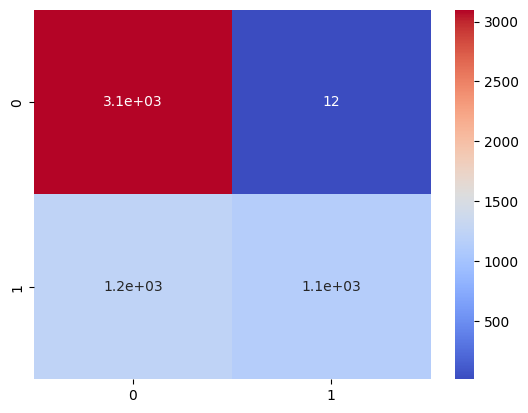

In [24]:
modelmltfidf(MultinomialNB())

Accuracy model in train data 93.87 %
Accuracy model in test data 89.77000000000001 %
Confusion Matrik in test data
 [[2967  144]
 [ 417 1958]]
Wrong prediction made (561, '/', 5486)


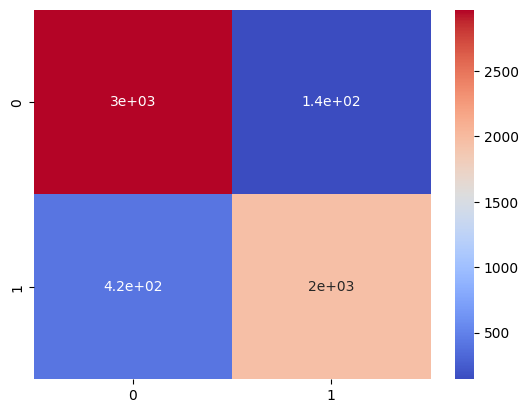

In [25]:
modelmlcv(MultinomialNB())

Random Forest classifier

Accuracy model in train data 99.99 %
Accuracy model in test data 90.01 %
Confusion Matrik in test data
 [[3034   77]
 [ 471 1904]]
Wrong prediction made (548, '/', 5486)
Visualisasi Confusion matrik


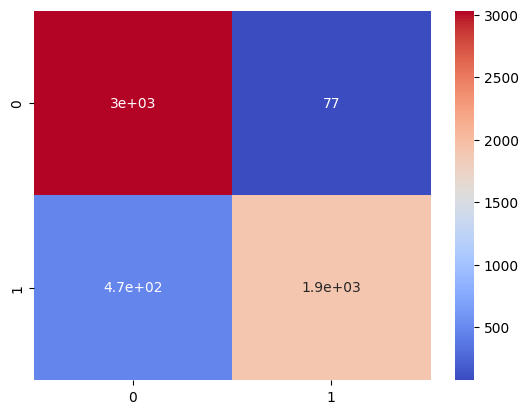

In [26]:
modelmltfidf(RandomForestClassifier())

Accuracy model in train data 99.99 %
Accuracy model in test data 89.83 %
Confusion Matrik in test data
 [[3035   76]
 [ 482 1893]]
Wrong prediction made (558, '/', 5486)


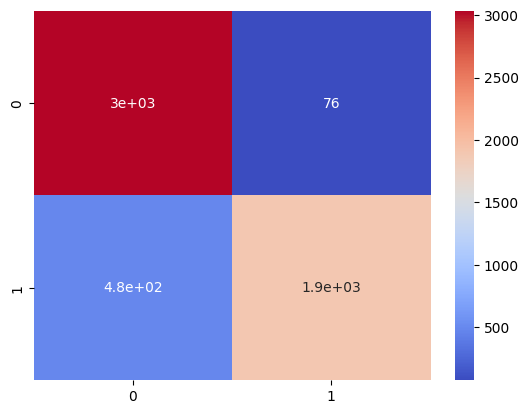

In [51]:
modelmlcv(RandomForestClassifier())

Logistic regresion

Accuracy model in train data 97.41 %
Accuracy model in test data 93.71000000000001 %
Confusion Matrik in test data
 [[2977  134]
 [ 211 2164]]
Wrong prediction made (345, '/', 5486)
Visualisasi Confusion matrik


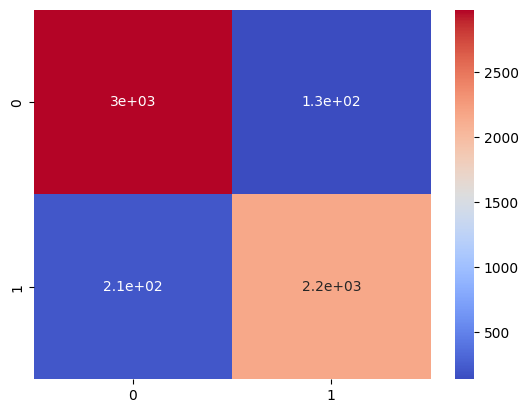

In [27]:
modelmltfidf(LogisticRegression())

Accuracy model in train data 99.99 %
Accuracy model in test data 94.37 %
Confusion Matrik in test data
 [[2953  158]
 [ 151 2224]]
Wrong prediction made (309, '/', 5486)


c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


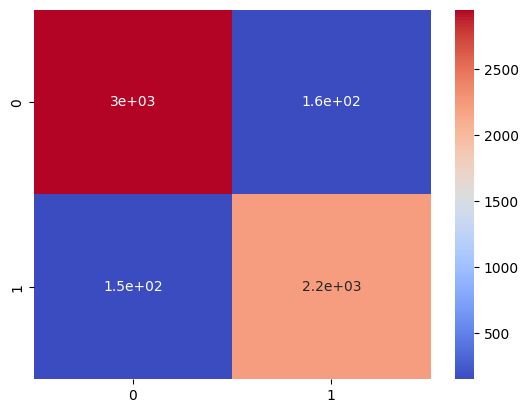

In [28]:
modelmlcv(LogisticRegression())

SVM

Accuracy model in train data 99.19 %
Accuracy model in test data 95.04 %
Confusion Matrik in test data
 [[2987  124]
 [ 148 2227]]
Wrong prediction made (272, '/', 5486)
Visualisasi Confusion matrik


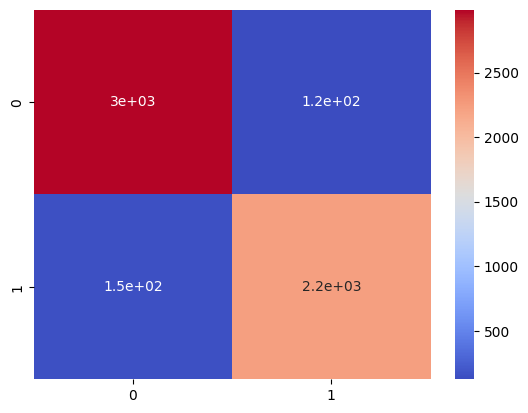

In [29]:
modelmltfidf(SVC(kernel='linear'))

Accuracy model in train data 99.99 %
Accuracy model in test data 93.67 %
Confusion Matrik in test data
 [[2933  178]
 [ 169 2206]]
Wrong prediction made (347, '/', 5486)


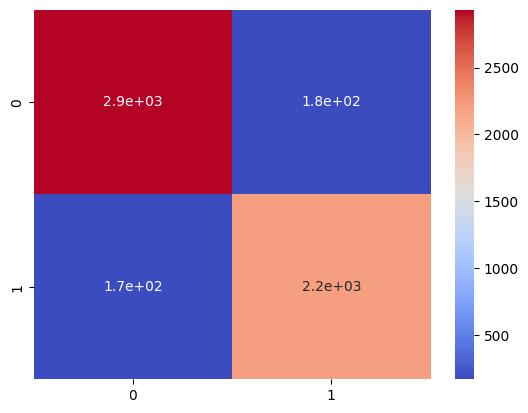

In [30]:
modelmlcv(SVC(kernel='linear'))

Dari hasil pertimbangan model machine learning menggunakan TfidfVectorizer (Term Frequency-Inverse Document Frequency), dan CountVectorizer, TfidfVectorizer menjadi transformer yang cukup ideal untuk kasus ini karena mampu mempertimbangkan seberapa penting kata dalam text berita relatif terhadapa seluruh corpus, dengan TFID model SVM menjadi algortima yang paling baik dari 4 algoritma digunakan karena memiliki nilai akurasi test sebesar 95.04 %, selain itu dalam prediksi nya dibanding 4 algoritma lain memiliki jumlah salah paling minimum yaitu 272/5486

Terimakasih